Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

Criação de dataset

In [3]:
np.random.seed(42)
n = 200
idade = np.random.randint(18, 65, size=n)
renda = np.random.randint(2000, 10000, size=n)
p = 1 / (1 + np.exp(-(0.02*(idade - 35) + 0.0006*(renda - 5000))))
compra = np.random.binomial(1, p)

df = pd.DataFrame({'idade': idade, 'renda': renda, 'compra': compra})
display(df.head())

,idade,renda,compra
0,56,5581,0
1,46,9974,1
2,32,5457,0
3,60,9554,0
4,25,9280,1


Separar variáveis dependentes, independentes e segmentos de treino e validação

In [4]:
X = df[['idade', 'renda']]
y = df['compra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Treinar modelo

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Métricas principais

In [6]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall (Sensibilidade):", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

Acurácia: 0.8333333333333334
Precisão: 0.8333333333333334
Recall (Sensibilidade): 0.9210526315789473
F1-score: 0.875
AUC-ROC: 0.8480861244019139


Matriz de confusão

In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:\n", cm)

Matriz de confusão:
 [[15  7]
 [ 3 35]]


Relatório completo

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.83      0.92      0.88        38

    accuracy                           0.83        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.83      0.83      0.83        60



Curva ROC e AUC

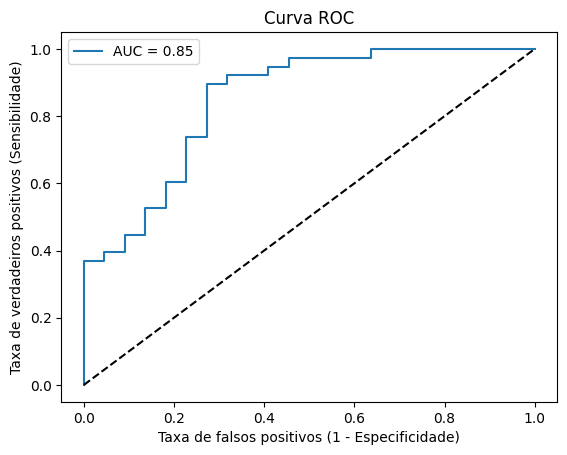

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de falsos positivos (1 - Especificidade)")
plt.ylabel("Taxa de verdadeiros positivos (Sensibilidade)")
plt.title("Curva ROC")
plt.legend()
plt.show()

Análise dos coeficientes e confiabilidade

In [10]:
X2 = sm.add_constant(X)  # adiciona intercepto
logit_model = sm.Logit(y, X2)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.501374
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 compra   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.2421
Time:                        12:14:58   Log-Likelihood:                -100.27
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 1.219e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0955      0.846     -4.838      0.000      -5.755      -2.437
idade          0.0223      0.

Diagnóstico e confiabilidade do modelo - Pseudo-R² (McFadden)

In [11]:
print("Pseudo R² (McFadden):", 1 - result.llf / result.llnull)

Pseudo R² (McFadden): 0.2421377424415232


Verificação de Multicolinearidade

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variável       VIF
0    idade  4.624572
1    renda -0.283133
